# 2nd Week : Finance 

The explore stock prediction using three different methods(and more):



1.  LinearRegresstion
2.  Ridge
3.  Lasso


*   and some more!

The 'Snap Inc.' stock data from Yahoo Finance using data reader from pandas.

Basically, We have to predict **Adjusted Close** price. 

---








In [0]:
# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data mnipulation
import numpy as np
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

# data visualisation
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style


#Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(15, 7))
mpl.__version__

#Adujsting the style of matplotlib
style.use('ggplot')

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV


In [3]:
#import data using DataReader from pandas

start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2019, 9, 3)

df = web.DataReader("SNAP", 'yahoo', start, end)

df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-27,16.305000,15.03,16.209999,15.51,31412800,15.51
2019-08-28,15.705000,15.25,15.300000,15.55,19117800,15.55
2019-08-29,16.080999,15.75,15.810000,15.78,14726900,15.78
2019-08-30,15.970000,15.55,15.930000,15.83,10591300,15.83
2019-09-03,16.400000,15.57,16.090000,15.93,30180100,15.93


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


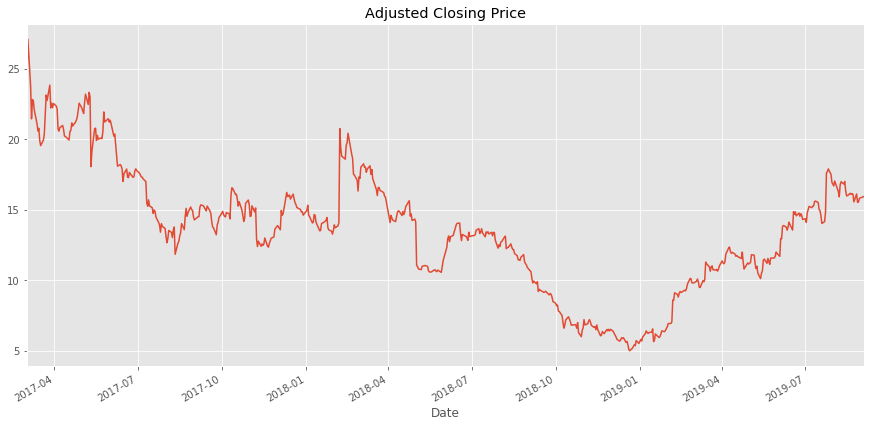

In [6]:
# visualization 'Adj Close'
df['Adj Close'].plot(label='SNAP', title='Adjusted Closing Price')

In [0]:
window_size = 32

num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size +1).astype(np.int)

In [0]:
data = df['Adj Close'].values[indices]

In [0]:
X = data[:,:-1]
y = data[:,-1]

split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]

## 1. Linear Regression

Use linear Regression from Scikit-Learn to predict Adj Close price. 

In [0]:
# Train data
Linear_models = LinearRegression()
Linear_models.fit(X_train, y_train)

# prediction
y_pred_train_linear = Linear_models.predict(X_train)
y_pred_linear = Linear_models.predict(X_test)

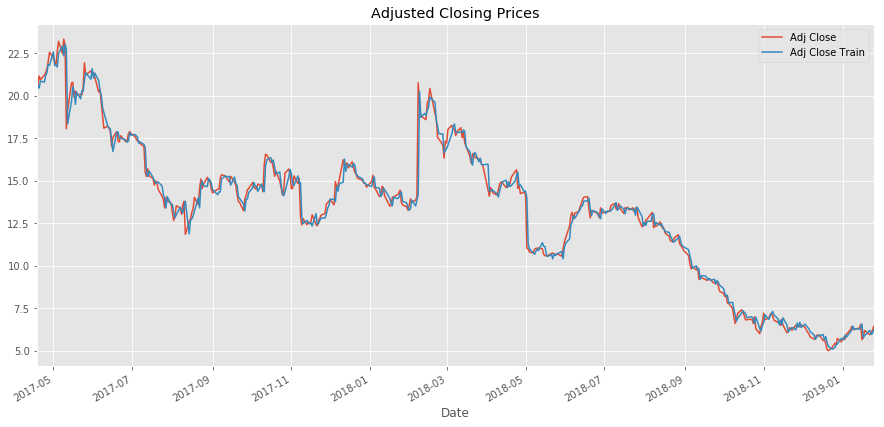

In [11]:
# make copy from df data to visualization 
df_Linear = df.copy()
# drop these columns to get 'Adj Close' visualize
df_Linear.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_Linear = df_Linear.iloc[window_size:ind_split]
df_Linear['Adj Close Train'] = y_pred_train_linear[:-window_size]
df_Linear.plot(label='SNAP', title='Adjusted Closing Prices')

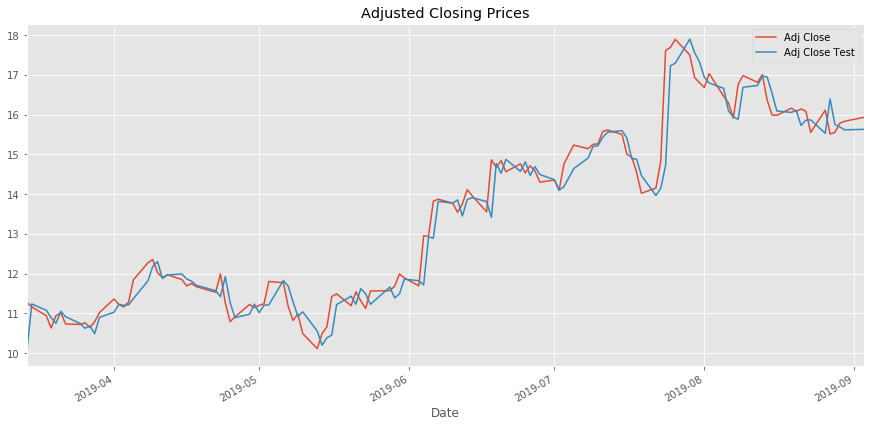

In [12]:
#also for test data(actual prediction)
df_Linear = df.copy()
df_Linear.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_Linear = df_Linear.iloc[ind_split+window_size:]
df_Linear['Adj Close Test'] = y_pred_linear
df_Linear.plot(label='SNAP', title='Adjusted Closing Prices')

## 2. Ridge Regression


In [0]:
# Train data
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Prediction
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

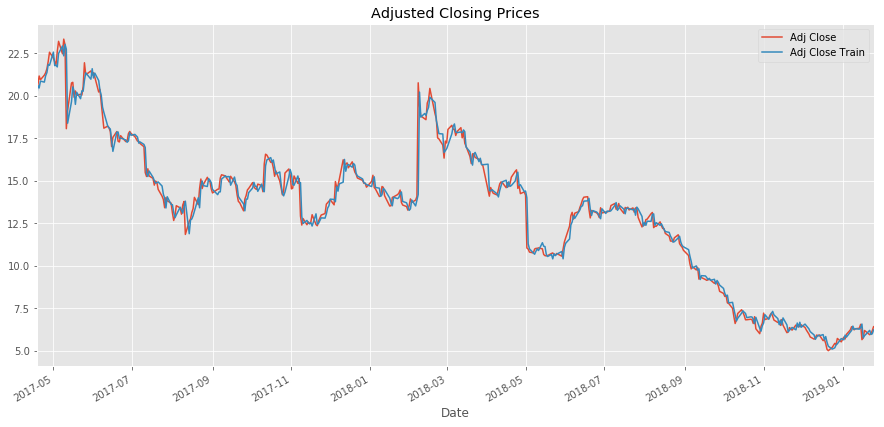

In [14]:
# make copy from df data to visualization 
df_ridge = df.copy()

# drop these columns to get 'Adj Close' visualize
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[window_size:ind_split]
df_ridge['Adj Close Train'] = y_pred_train_ridge[:-window_size]
df_ridge.plot(label='SNAP', title='Adjusted Closing Prices')

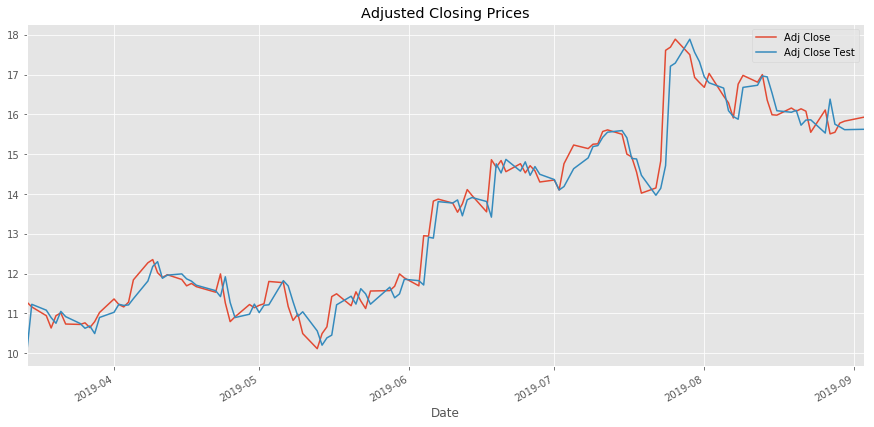

In [15]:
# also for prediction model

df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[ind_split+window_size:]
df_ridge['Adj Close Test'] =y_pred_ridge
df_ridge.plot(label='SNAP', title='Adjusted Closing Prices')

## 3. Lasso Regression

In [0]:
# Train Data
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Prediction
y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_lasso = lasso_model.predict(X_test)

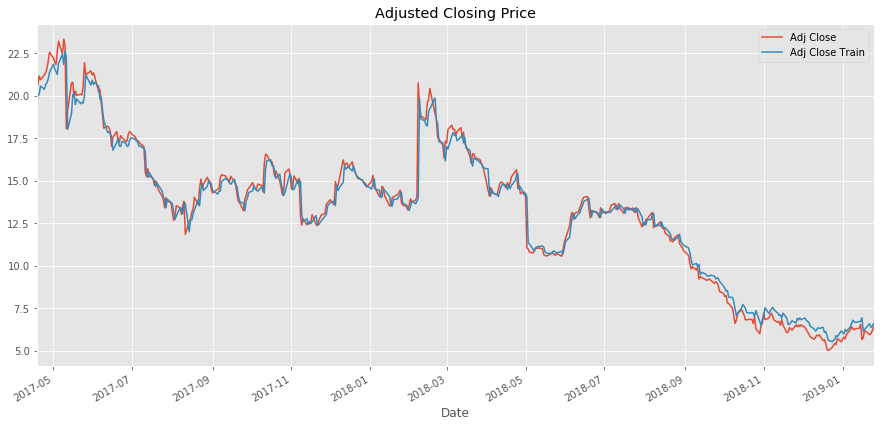

In [20]:
# make copy from df data to visualization
df_lasso = df.copy()

# drop these columns to get 'Adj Close' visualize
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[window_size:ind_split]
df_lasso['Adj Close Train'] = y_pred_train_lasso[:-window_size]
df_lasso.plot(label='SNAP', title = "Adjusted Closing Price")

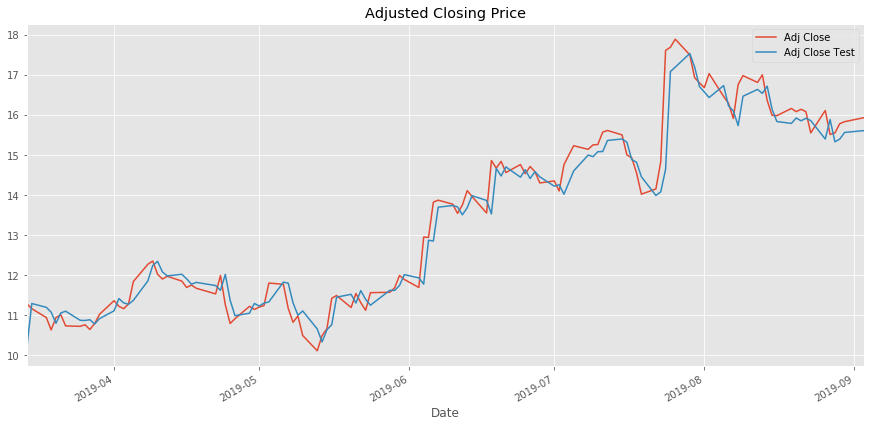

In [21]:
# actual Test data prediction model
df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[ind_split+window_size:]
df_lasso['Adj Close Test'] = y_pred_lasso
df_lasso.plot(label='SNAP', title = 'Adjusted Closing Price')